In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
D1_05 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-18-16\Nabond on CPW 0.5mW scan 2  x180 y22 rotor.txt')
D1_1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-18-16\Nabond on CPW 1mW scan 2  x180 y22 rotor.txt')
D1_5 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-18-16\Nabond on CPW 5mW scan 2  x180 y22 rotor.txt')

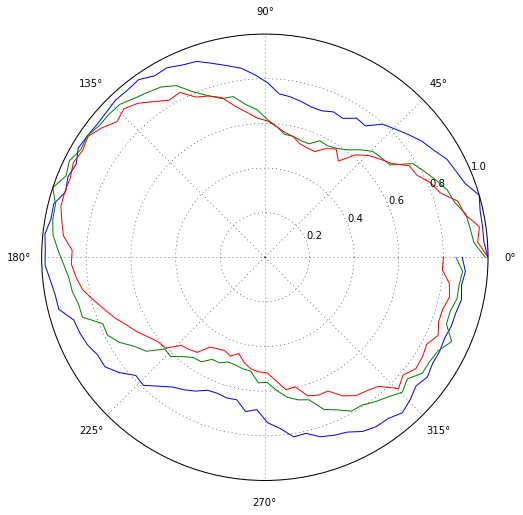

In [14]:
plt.polar(D1_5[:,0]*2*np.pi/360,D1_5[:,1]/np.max(D1_5[:,1]))
plt.polar(D1_1[:,0]*2*np.pi/360,D1_1[:,1]/np.max(D1_1[:,1]))
plt.polar(D1_05[:,0]*2*np.pi/360,D1_05[:,1]/np.max(D1_05[:,1]))

In [15]:
D2_05 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-18-16\Nabond on CPW 5mW scan 2  x191 y83 rotor.txt')
D2_1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-18-16\Nabond on CPW 1mW scan 2  x191 y83 rotor.txt')
D2_5 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-18-16\Nabond on CPW 0.5mW scan 2  x191 y83 rotor.txt')

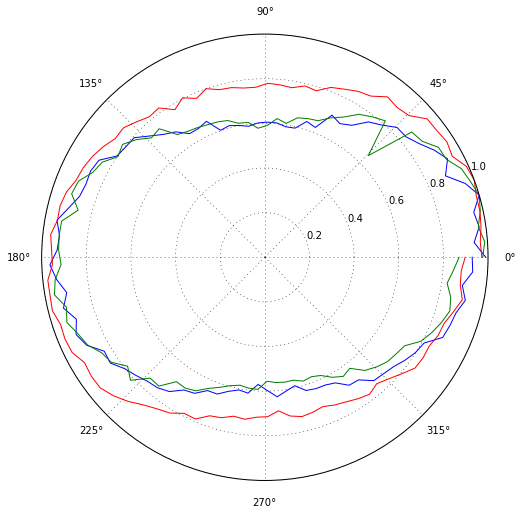

In [16]:
plt.polar(D2_5[:,0]*2*np.pi/360,D2_5[:,1]/np.max(D2_5[:,1]))
plt.polar(D2_1[:,0]*2*np.pi/360,D2_1[:,1]/np.max(D2_1[:,1]))
plt.polar(D2_05[:,0]*2*np.pi/360,D2_05[:,1]/np.max(D2_05[:,1]))

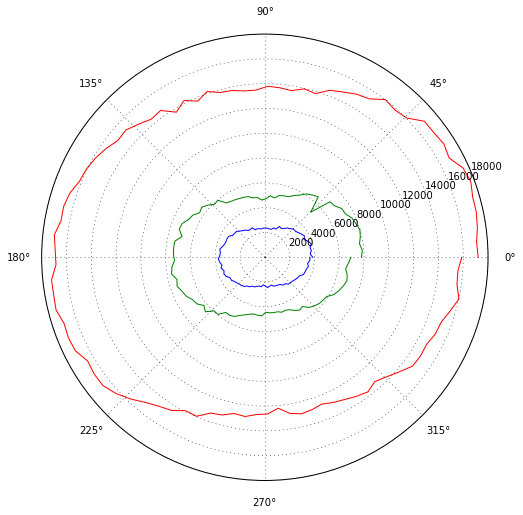

In [17]:
plt.polar(D2_5[:,0]*2*np.pi/360,D2_5[:,1])
plt.polar(D2_1[:,0]*2*np.pi/360,D2_1[:,1])
plt.polar(D2_05[:,0]*2*np.pi/360,D2_05[:,1])

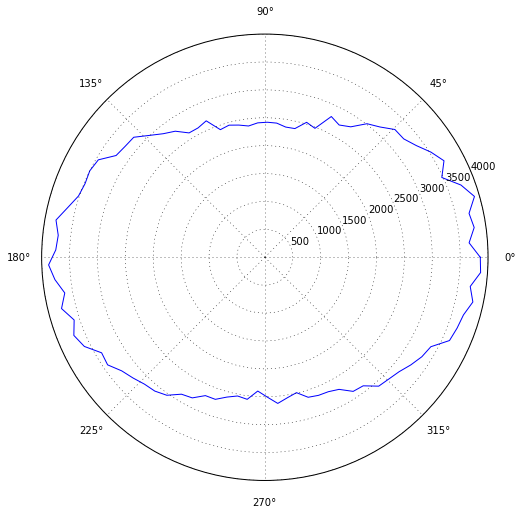

In [21]:
plt.polar(D2_5[:,0]*2*np.pi/360,D2_5[:,1]+np.linspace(0,D2_5[0,1]-D2_5[-1,1],num=D2_5.shape[0]))

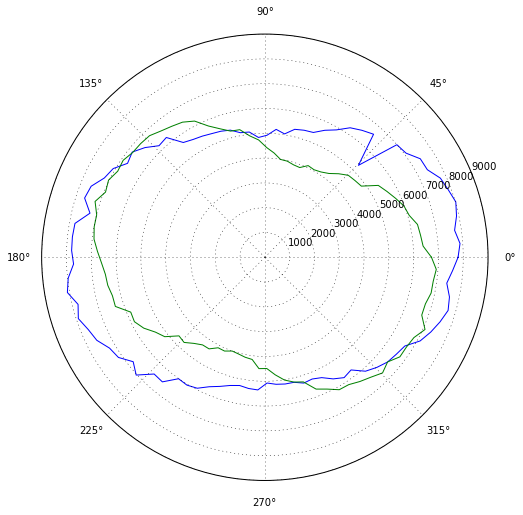

In [23]:
D2_1[:,1] = D2_1[:,1]+np.linspace(0,D2_1[0,1]-D2_1[-1,1],num=D2_1.shape[0])
D1_1[:,1] = D1_1[:,1]+np.linspace(0,D1_1[0,1]-D1_1[-1,1],num=D1_1.shape[0])
plt.polar(D2_1[:,0]*2*np.pi/360,D2_1[:,1])
plt.polar(D1_1[:,0]*2*np.pi/360,D1_1[:,1])

In [24]:
D2_1[:,0] = D2_1[:,0]*2*np.pi/360
D1_1[:,0] = D1_1[:,0]*2*np.pi/360

In [2]:
def pol(X,phi,theta,a):
    return a*(np.cos(X-phi)**2+(np.cos(theta)*np.sin(X-phi))**2)

opt2,cov2 = curve_fit(pol,D2_1[:,0],D2_1[:,1],p0=(0,np.pi/4,7000))
print opt1

plt.polar(D2_1[:,0],D2_1[:,1],'ko')
plt.polar(D2_1[:,0],pol(D2_1[:,0],*opt2),'r-')

print "Phi: %2f" % (opt2[0]*180/np.pi+90)
print "Theta: %2f" % (opt2[1]*180/np.pi)
print "Phi(naive): %2f" % (D2_1[np.argmin(D2_1[:,1]),0]*180/np.pi)
print "Theta(naive): %2f" % (np.arccos(np.sqrt(np.min(D2_1[:,1])/np.max(D2_1[:,1])))*180/np.pi)

NameError: name 'D2_1' is not defined

[ -3.66016039e-01   8.28774757e-01   5.43928542e+03]
Phi: 69.028826
Theta: 47.485296
Phi(naive): 68.764000
Theta(naive): 50.852549


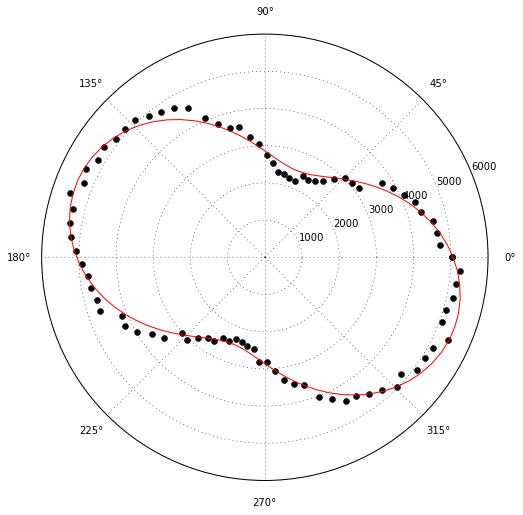

In [60]:
opt1,cov1 = curve_fit(pol,D1_1[:,0],D1_1[:,1],p0=(0,np.pi/4,7000))
print opt1

plt.polar(D1_1[:,0],D1_1[:,1],'ko')
plt.polar(D1_1[:,0],pol(D1_1[:,0],*opt1),'r-')

print "Phi: %2f" % (opt1[0]*180/np.pi+90)
print "Theta: %2f" % (opt1[1]*180/np.pi)
print "Phi(naive): %2f" % (D1_1[np.argmin(D1_1[:,1]),0]*180/np.pi)
print "Theta(naive): %2f" % (np.arccos(np.sqrt(np.min(D1_1[:,1])/np.max(D1_1[:,1])))*180/np.pi)

In [47]:
D1_x = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-19-16\Nabond on CPW 5mW scan 1 x169 y29 B0.5V T0.txt')
D1_y = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-19-16\Nabond on CPW 5mW scan 1 x169 y29 B0.5V T90.txt')
D1_z = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-19-16\Nabond on CPW 5mW scan 1 x169 y29 B0.5V T0 x14_3.txt')
D1_x = D1_x[1:,:]
D1_y = D1_y[1:,:]
D1_z = D1_z[1:,:]

In [3]:
def lorentzian(X,x0,c):
    return c**2/(np.pi*c*(c**2+(X-x0)**2))

def ODMRfit(X,a1,f1,w1,a2,f2,w2):
    return a1*lorentzian(X,f1,w1)+a2*lorentzian(X,f2,w2)

X field: 8.12 mT 
Y field: 6.68 mT 
Z field: 5.58 mT
B: 12.28
Phi: 39.43
Theta: 58.92


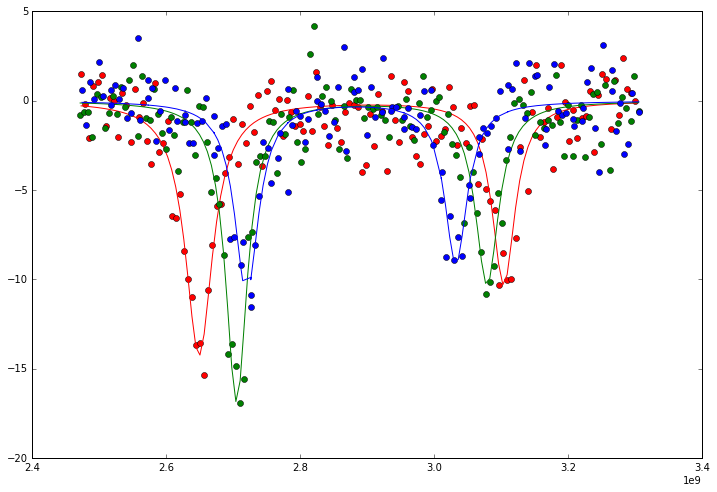

In [53]:
poptX, pcov = curve_fit(ODMRfit,D1_x[:,0],D1_x[:,1],p0=(-4E8,2.7E9,1E7,-4E8,3E9,1E7))
plt.plot(D1_x[:,0],D1_x[:,1],'ro')
plt.plot(D1_x[:,0],ODMRfit(D1_x[:,0],*poptX),'r-')

poptY, pcov = curve_fit(ODMRfit,D1_y[:,0],D1_y[:,1],p0=(-4E8,2.7E9,1E7,-4E8,3E9,1E7))
plt.plot(D1_y[:,0],D1_y[:,1],'go')
plt.plot(D1_y[:,0],ODMRfit(D1_y[:,0],*poptY),'g-')

poptZ, pcov = curve_fit(ODMRfit,D1_z[:,0],D1_z[:,1],p0=(-4E8,2.7E9,1E7,-4E8,3E9,1E7))
plt.plot(D1_z[:,0],D1_z[:,1],'bo')
plt.plot(D1_z[:,0],ODMRfit(D1_z[:,0],*poptZ),'b-')

g = 28E6 #NV gyromagnetic ratio in Hz/mT
Bx = (poptX[4]-poptX[1])/(2*g)
By = (poptY[4]-poptY[1])/(2*g)
Bz = (poptZ[4]-poptZ[1])/(2*g)

print "X field: %.2f mT \nY field: %.2f mT \nZ field: %.2f mT" % (Bx,By,Bz)

Bz = Bz/0.88 #scale Bz to account for inhomogenous field strength under z rotation
B = np.sqrt(Bx**2+By**2+Bz**2)
phi = np.arctan(By/Bx)*180/np.pi
theta = np.arccos(Bz/B)*180/np.pi
print "B: %.2f\nPhi: %.2f\nTheta: %.2f" % (B,phi,theta)

[ -3.85691923e-01   8.25515130e-01   4.64226298e+03]
Phi: 67.901481
Theta: 47.298533
Phi(naive): 64.719000
Theta(naive): 50.221892


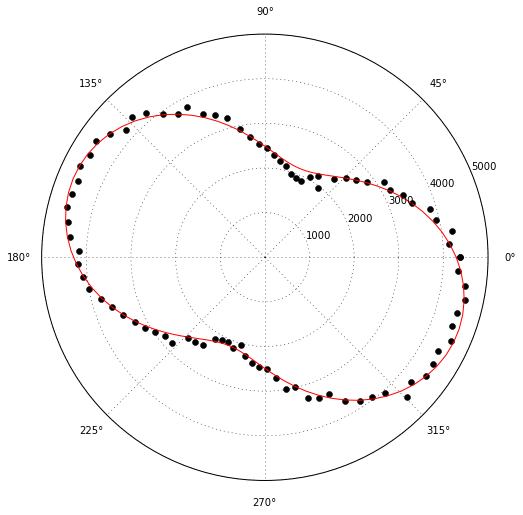

In [58]:
opt105,cov105 = curve_fit(pol,D1_05[:,0],D1_05[:,1],p0=(0,np.pi/4,7000))
print opt105

plt.polar(D1_05[:,0],D1_05[:,1],'ko')
plt.polar(D1_05[:,0],pol(D1_05[:,0],*opt105),'r-')

print "Phi: %2f" % (opt105[0]*180/np.pi+90)
print "Theta: %2f" % (opt105[1]*180/np.pi)
print "Phi(naive): %2f" % (D1_05[np.argmin(D1_05[:,1]),0]*180/np.pi)
print "Theta(naive): %2f" % (np.arccos(np.sqrt(np.min(D1_05[:,1])/np.max(D1_05[:,1])))*180/np.pi)

In [5]:
D1_x = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-20-16\Nabond on CPW 1mw ODMR position2 scan 4 x52 y129 B0.5V T0.txt')
D1_y = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-20-16\Nabond on CPW 1mw ODMR position2 scan 4 x52 y129 B0.5V T90.txt')
D1_z = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-20-16\Nabond on CPW 1mw ODMR position2 scan 4 x52 y129 B0.5V T0 x14_3.txt')
D1_x = D1_x[1:,:]
D1_y = D1_y[1:,:]
D1_z = D1_z[1:,:]

X field: 5.71 mT 
Y field: 1.11 mT 
Z field: 1.94 mT
B: 6.22
Phi: 10.99
Theta: 69.25


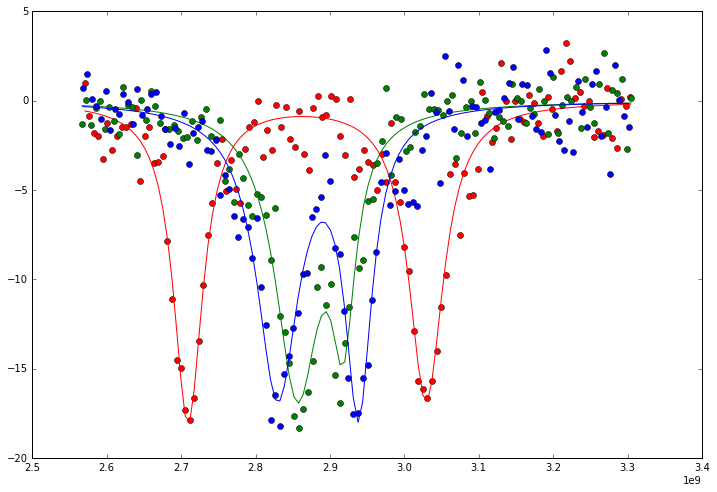

In [8]:
poptX, pcov = curve_fit(ODMRfit,D1_x[:,0],D1_x[:,1],p0=(-4E8,2.7E9,1E7,-4E8,3E9,1E7))
plt.plot(D1_x[:,0],D1_x[:,1],'ro')
plt.plot(D1_x[:,0],ODMRfit(D1_x[:,0],*poptX),'r-')

poptY, pcov = curve_fit(ODMRfit,D1_y[:,0],D1_y[:,1],p0=(-4E8,2.8E9,1E7,-4E8,2.9E9,1E7))
plt.plot(D1_y[:,0],D1_y[:,1],'go')
plt.plot(D1_y[:,0],ODMRfit(D1_y[:,0],*poptY),'g-')

poptZ, pcov = curve_fit(ODMRfit,D1_z[:,0],D1_z[:,1],p0=(-4E8,2.8E9,1E7,-4E8,2.86E9,1E7))
plt.plot(D1_z[:,0],D1_z[:,1],'bo')
plt.plot(D1_z[:,0],ODMRfit(D1_z[:,0],*poptZ),'b-')

g = 28E6 #NV gyromagnetic ratio in Hz/mT
Bx = (poptX[4]-poptX[1])/(2*g)
By = (poptY[4]-poptY[1])/(2*g)
Bz = (poptZ[4]-poptZ[1])/(2*g)

print "X field: %.2f mT \nY field: %.2f mT \nZ field: %.2f mT" % (Bx,By,Bz)

Bz = Bz/0.88 #scale Bz to account for inhomogenous field strength under z rotation
B = np.sqrt(Bx**2+By**2+Bz**2)
phi = np.arctan(By/Bx)*180/np.pi
theta = np.arccos(Bz/B)*180/np.pi
print "B: %.2f\nPhi: %.2f\nTheta: %.2f" % (B,phi,theta)

[  1.89872145e-01   5.41666039e-01   1.21954560e+04]
Phi: 100.878873
Theta: 31.035178
Phi(naive): 287.191000
Theta(naive): 36.547415


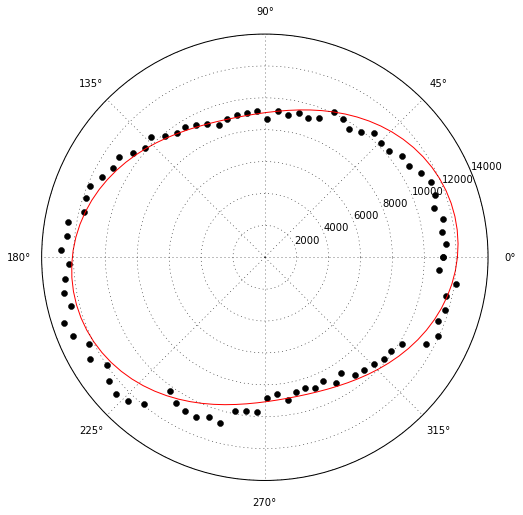

In [9]:
D1_05 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\5-20-16\Nabond on CPW 1mw ODMR position2 scan 4 x52 y129 B0.5V T0 x14_3 Rotor Sweep.txt')
D1_05[:,0] = D1_05[:,0]*2*np.pi/360
D1_05[:,1] = D1_05[:,1]+np.linspace(0,D1_05[0,1]-D1_05[-1,1],num=D1_05.shape[0])-2623

opt105,cov105 = curve_fit(pol,D1_05[:,0],D1_05[:,1],p0=(0,np.pi/4,7000))
print opt105

plt.polar(D1_05[:,0],D1_05[:,1],'ko')
plt.polar(D1_05[:,0],pol(D1_05[:,0],*opt105),'r-')

print "Phi: %2f" % (opt105[0]*180/np.pi+90)
print "Theta: %2f" % (opt105[1]*180/np.pi)
print "Phi(naive): %2f" % (D1_05[np.argmin(D1_05[:,1]),0]*180/np.pi)
print "Theta(naive): %2f" % (np.arccos(np.sqrt(np.min(D1_05[:,1])/np.max(D1_05[:,1])))*180/np.pi)